# Ejemplos con Sklearn#
*Emilio Barragán Rodríguez*

 # *Índice*

1. [Imágenes de dígitos escritos a manos](#Imágenes-de-dígitos-escritos-a-manos)
    1. [Exploración preliminar del dataset](#Exploración-preliminar-del-dataset)
    2. [Clasificación](#Clasificación)
    3. [Conclusiones](#Conclusiones)
      
2. [Críticas de cine en IMDB](#2.-Críticas-de-cine-en-IMDB)
    1. [Exploración preliminar de las reviews](#Exploración-preliminar-de-las-reviews)
    1. [Limpieza de datos](#Limpieza-de-datos)
    2. [Clasificación de reviews](#Clasificación-de-reviews)

3. [Boston dataset](#3.-Boston-dataset)
    1. [Descripción del dataset](#Descripción-del-dataset)
    2. [Predicción de precios](#Predicción-de-precios)

# 1. Imágenes de dígitos escritos a manos

In [472]:
# Importamos el dataset de dígitos desde sklearn.
from sklearn.datasets import load_digits

# Cargamos el dataset en la variable digitos.
digitos = load_digits()

## Exploración preliminar del dataset

Mostramos una imagen cualquiera de nuestros datos para ver cómo son:

<Figure size 432x288 with 0 Axes>

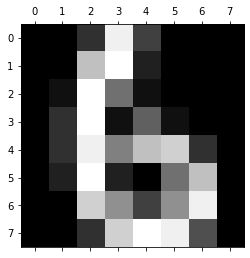

Clase de la imagen: 6


In [473]:
# Importamos matplotlib:

import matplotlib.pyplot as plt

# Queremos que lo muestre en blanco y negro.
plt.gray()

# matshow nos permite representar "gráficamente" una imagen desde una matriz.
plt.matshow(digitos.images[234]) 
plt.show() 
print("Clase de la imagen: {}".format(digitos.target[234]))

### Descripción básica

Veamos cómo son los datos que tenemos en nuestro dataset:

In [474]:
print()
print(digitos.data) # .data nos devuelve el conjunto de datos (X).


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Shape del dataset. Esto nos devuelve una tupla del tipo (ejemplos, features), aunque en nuestro caso **cada feature es un pixel de la imagen**:

In [475]:
print()
print(digitos.data.shape) # .shape nos devuelve la forma de nuestro dataset.


(1797, 64)


Nos devuelve (1797, 64). Esto quiere decir que tenemos 1797 ejemplos y 64 pixeles por cada uno. 

Veamos las distintas clases (números) que tenemos:

In [476]:
print()
print(digitos.target_names) # .target_names nos devuelve las clases que hay en nuestro dataset.


[0 1 2 3 4 5 6 7 8 9]


Tenemos entonces imágenes de los números del 0 al 9.

Descripción del dataset:

In [477]:
print()
print(digitos.DESCR) # .DESCR nos muestra una descripción general del dataset.


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bl

### Algunas gráficas

Separamos el dataset en los datos y sus correspondientes targets

In [478]:
# A "X_digitos" le asignamos "digitos.data" (que es donde están todos nuestros píxeles)
# y a "y_digitos" le asignamos "digitos.target" (que es donde están todas las clases)
# para cada uno de nuestros ejemplos.

X_digitos, y_digitos = digitos.data, digitos.target

Veamos ahora si nuestro dataset está equilibrado. Primero usaremos un histograma:

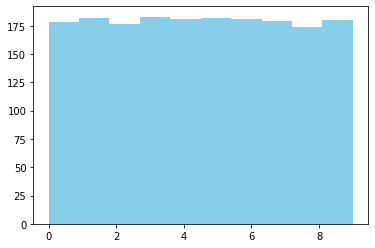

In [479]:
print()

x = y_digitos                          # La altura del histograma la marcará la cantidad
                                       # de ejemplos de cada número.
    
plt.hist(x, bins = 10,# El número de barras es 10 ya que hay 10 clases de números.
         color="skyblue")  # He elegido el color celeste..

plt.show()                             # Mostramos el histograma.

 Ahora con una pie plot

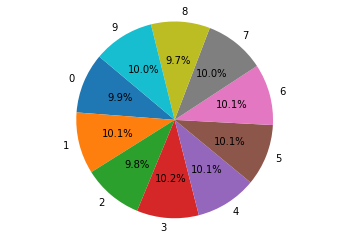

In [480]:
print() 

lista_digitos = y_digitos.tolist() # Lista con todas las clasificaciones de nuestro dataset
labels = [0,1,2,3,4,5,6,7,8,9]     # Labels para nuestra tarta

# El tamaño de cada trozo será el número de veces que aparece cada número en nuestra lista lista_digitos
sizes = [lista_digitos.count(0),lista_digitos.count(1),lista_digitos.count(2),
         lista_digitos.count(3),lista_digitos.count(4),lista_digitos.count(5),
         lista_digitos.count(6),lista_digitos.count(7),lista_digitos.count(8),lista_digitos.count(9)]

# Plot
plt.pie(sizes,              # Declaramos los tamaños para cada trozo
        labels=labels,      # Declaramos cuáles son las etiquetas
        autopct='%1.1f%%',  # Opción para mostrar los porcentajes
        startangle=140)     # Ángulo en el que queremos empezar

plt.axis('equal')           # Opción para que la gráfica salga mejor centrada
plt.show()

 Vemos que nuestro dataset está bastante bien equilibrado, ya que tenemos aproximadamente los mismos ejemplos para cada clase de número. Tenemos alrededor del 10% de los ejemplos para cada uno.

## Clasificación

Nuestro objetivo con este dataset es poder clasificar las imágenes, diciendo de qué número se trata en cada caso.

In [481]:
# Para separar nuestro dataset en test y train.
from sklearn.model_selection import train_test_split 

# Para poder usar cross validation
from sklearn.model_selection import cross_val_score

# El modelo de clasificación que vamos a usar.
from sklearn.svm import SVC

# GridSearchCV. Para búsqueda de parámetros.
from sklearn.model_selection import GridSearchCV

import numpy as np

### Creación del modelo

 Para este primer apartado, vamos a separar nuestro dataset en entrenamiento y test. Vamos a darle al entrenamiento el 80% de los datos.

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X_digitos, y_digitos , train_size=0.8)

In [483]:
X_train

array([[ 0.,  1.,  8., ...,  5.,  0.,  0.],
       [ 0.,  0.,  2., ...,  3.,  0.,  0.],
       [ 0.,  0., 12., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.]])

En esta ocasión, no necesitamos normalizar y/o estandarizar nuestros datos ya que los valores para cada píxel de nuestras imágenes **se mueven en el mismo rango**.

### SVC

El modelo de clasificación elegido es el modelo SVC. Es un modelo SVM (Support Vector Machine) pero aplicándole una **función Kernel** (cambiándole la dimensionalidad). Este modelo se ajusta a los datos de manera que "devuelve" el hiperplano que separa a las distintas clases. Este hiperplano intenta estar lo más separado de los elementos de cada clase.

 ### GridSearchCV

```GridSearchCV``` nos permite encontrar la mejor asignación de parámetros para nuestro modelo. Lo único malo es que lo hace por medio de la saturación, es decir, probando y probando. Por lo que muchas veces será bastate lento. Vamos a usarlo para encontrar los mejores parámetros de nuestro modelo.

Primero tenemos que definir los parámetros de nuestro modelo sobre los que haremos la búsqueda, y el rango en el que la haremos:

In [484]:
params = {'C':np.arange(0.5, 3., 0.5), # Parámetro de regularización. La fuerza de dicha regularización es
                                       # inversamente proporcional a C.
          'kernel':('rbf','sigmoid'),  # Función para redimensionar nuestro SVM.
          'gamma':np.arange(0., 0.005, 0.0005) # Coeficiente del kernel.
}

Después creamos nuestro modelo con ```GridSearchCV``` y le pasamos el modelo que queremos usar, los parámetros y las partes en las que queremos dividir los datos a la hora de hacer la búsqueda, para ver qué parámetros son mejores. El parámetro ```n_jobs``` nos permite usar tantos cores como tengamos disponibles, ya que la búsqueda requiere bastante cómputo. Si su valor es -1 es que estamos cogiendo todos los posibles.

In [485]:
modeloGSCV = GridSearchCV(SVC(), params, cv=5, n_jobs=-1)

Por último entrenamos el modelo con nuestros datos:

In [486]:
modeloGSCV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5]),
                         'gamma': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045]),
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Los mejores parámetros encontrados por GridSearchCV:

In [487]:
print(modeloGSCV.best_params_)

{'C': 2.5, 'gamma': 0.0005, 'kernel': 'rbf'}


Puntuación (medida en precisión, cuánto acierta):

In [488]:
print("Score: ", modeloGSCV.score(X_test, y_test))

Score:  0.9944444444444445


Para ver algún elemento que esté bien clasificado y alguno que esté mal clasificado creamos una función:

In [489]:
def bienMal(predicciones, test):
    """
    Función para ver qué elementos están mal y bien clasificados.
    Recibe: predicciones hechas y datos de test sobre los que comprobar.
    Devuelve: una tupla donde el primer elemento es el índice del primer
    elemento bien clasificado, y el segundo elemento es el índice del
    primer elemento mal clasificado.
    """
    bien = []
    mal = []
    for i in range(len(predicciones)):
        if predicciones[i]==test[i]: # Cogemos el primero que esté bien clasificado.
            bien = i
            break
    for i in range(len(predicciones)):
        if predicciones[i]!=test[i]: # Cogemos el primero que esté mal clasificado.
            mal = i
            break
    print("Índice del primer elemento bien clasificado: " + str(bien))
    print("Índice del primer elemento mal clasificado: " + str(mal))
    return (bien,mal)

In [490]:
predicciones = modeloGSCV.predict(X_test)
bienmal = bienMal(predicciones, y_test)

Índice del primer elemento bien clasificado: 0
Índice del primer elemento mal clasificado: 232


<Figure size 432x288 with 0 Axes>

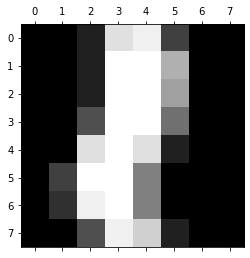

Clase de la imagen: 1
Clasificaión: 1


In [491]:
imagen = X_test[0].reshape(8,8)  # El reshape se debe a que las imágenes de X_train son 1 dimensionales, no son matrices.
plt.gray()
plt.matshow(imagen) 
plt.show() 
print("Clase de la imagen: {}".format(y_test[bienmal[0]]))
print("Clasificaión: {}".format(predicciones[bienmal[0]]))

<Figure size 432x288 with 0 Axes>

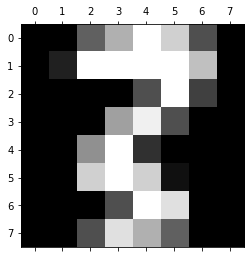

Clase de la imagen: 3
Clasificación: 2


In [492]:
imagen = X_test[bienmal[1]].reshape(8,8)
plt.gray()
plt.matshow(imagen) 
plt.show() 
print("Clase de la imagen: {}".format(y_test[bienmal[1]]))
print("Clasificación: {}".format(predicciones[bienmal[1]]))

### Cross Validation

Vamos a usar cross validation con el modelo obtenido en el punto anterior. Cross validation es un método para probar cómo de bueno es nuestro modelo. La técnica se basa en partir nuestros datos en partes, iterar sobre los datos un número de veces igual a las partes que tenemos y, en cada iteración, usar una parte de test y el resto de entrenamiento. Cambiando la parte dedicada a test en cada iteración.

In [493]:
modeloCross = modeloGSCV
scores = cross_val_score(modeloCross, X_digitos, y_digitos, cv=3, n_jobs=-1)

In [494]:
print(scores)

[0.97161937 0.98330551 0.96994992]


Vemos que nuestro modelo tiene buena precisión en todas las partes, por lo que podríamos decir que es un buen modelo.

### Matriz de confusión

La matriz de confusión nos indica si algún elemento ha sido mal clasificado, cuál ha sido la clasificación y cuál era la correcta. Por definición, una matriz de confusión C es tal que C<sub>i,j</sub> es igual al número de observaciones de la clase *i* que han sido predecidas de clase *j*.

In [495]:
from sklearn.metrics import plot_confusion_matrix

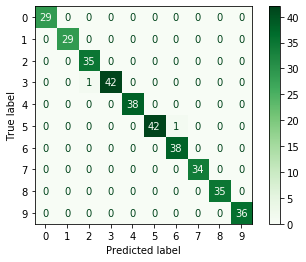

In [496]:
plot_confusion_matrix(modeloGSCV, X_test, y_test, digitos.target_names, cmap=plt.cm.Greens)
plt.show()

## Clasificador binario de 9 y 4

### Preparación de datos

Tenemos que coger solo las imágenes que pertenezcan a los números 4 y 9:

In [497]:
cont = 0
listaxtrain = []
listaytrain = []
for x in y_digitos:
    if x==4 or x==9:
        listaxtrain.append(X_digitos[cont])
        listaytrain.append(x)
    cont+=1

Los separamos en train y test:

In [498]:
X_train, X_test, y_train, y_test = train_test_split(listaxtrain, listaytrain , train_size=0.8)

### Random Forest

Vamos a usar un Random Forest. Esta clase de modelo entrena muchos árboles de decisión y usa la media de la predicción de estos para mejorar la predicción final.

In [499]:
from sklearn.ensemble import RandomForestClassifier

In [500]:
params = dict(criterion =['gini', 'entropy'], # Función para determinar la pureza de una división.
              n_estimators = [100, 200, 300], # Número de árboles de decisión a entrenar.
              max_depth = [15, 16, 17, 18, 19, 20], # Profundidad máxima de los árboles.
              min_samples_split = [2, 3, 4, 5], # Número mínimo de ejemplos requeridos para poder dividir un nodo.
              min_samples_leaf = [1, 2, 3, 4]) # Número mínimo de ejemplos por hoja.

In [501]:
forest = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, cv=5, n_jobs=-1)

In [502]:
forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [503]:
forest.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [504]:
forest.score(X_test, y_test)

0.9726027397260274

Tenemos un clasificador con una puntuación muy cercana a 1 (en ocasiones incluso 1), por lo que podemos decir que diferenciamos bien entre el 9 y el 4.

## Conclusiones

Hemos conseguido un buen modelo para clasificar los números de nuestro dataset pero, en el mundo real, podría no servirnos de mucho. Esto se debe a que cada persona escribe los números de una forma distinta, por lo tanto, si le damos a nuestro modelo números escritos por otra persona, puede que no lo clasifique bien.  
Vamos a ver esto mediante un ejemplo, cargando una imagen de un número escrito por mí:

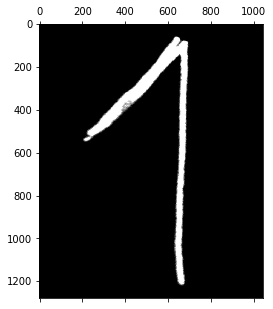

In [505]:
image1 = plt.imread('1.png')
plt.matshow(image1) 
plt.show() 

Esta es la imagen real, invertida en color, de nuestro número. Para que nuestro modelo la acepte, tenemos que pasarla a 8x8 (no lo hemos mostrado aquí), lo que nos dejaría la siguiente imagen:

<Figure size 432x288 with 0 Axes>

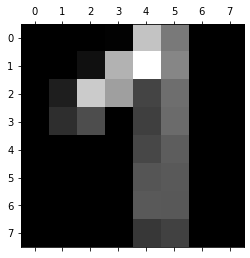

In [506]:
image1r = plt.imread('1resized.png')
plt.gray()
plt.matshow(image1r) 
plt.show()

Sigue habiendo un problema, y es que tenemos una matriz, no un array 1-dimensional (lo que acepta nuestro modelo), así que lo modificamos:

In [507]:
image1r = np.asarray([x[i] for x in image1r for i in range(len(image1r[0]))]).reshape(1, -1)

Ahora intentamos averiguar qué número es con nuestro modelo (puede acertar o no:

In [508]:
modeloGSCV.predict(image1r)

array([4])

# 2. Críticas de cine en IMDB

In [509]:
# Para cargar nuestros datos
from sklearn.datasets import load_files

# Para vectorizar las reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

##  Exploración preliminar de las reviews

Nuestro dataset está compuesto de reviews sobre películas en IMDB. Cada review tiene asociado un sentimiento, positivo (1) o negativo (0). Lo podemos descargar [aquí](http://ai.stanford.edu/~amaas/data/sentiment/).

Cargamos el dataset tanto para train como para test:

In [510]:
reviews_train = load_files("data/aclImdb/train/")
reviews_test = load_files("data/aclImdb/test/")

Hay que tener en cuenta que para hacer este paso hemos tenido que borrar la carpeta ```unsup``` de la carpeta ```aclImdb```. Esta carpeta es para usar con unsupervised learning, lo cual no veremos aquí.

Tenemos 25000 reviews para entrenar y 25000 para test:

In [511]:
print(len(reviews_train.data))

25000


In [512]:
print(len(reviews_test.data))

25000


Nuestros targets, lo que intentamos predecir de cada review, es neg (negativo, un 0) ó pos (positivo, un 1).

In [513]:
print(reviews_train.target_names)

['neg', 'pos']


## Limpieza de datos

In [514]:
text_train, y_train = reviews_train.data, reviews_train.target
text_test, y_test = reviews_test.data, reviews_test.target

Quitamos algunas marcas en HTML, para "limpiar" los textos. Como los datos los carga en bytes, yo los voy a pasar a string:

In [515]:
text_train = [str(doc.replace(b"<br />", b" "), 'utf-8') for doc in text_train]
text_test = [str(doc.replace(b"<br />", b" "), 'utf-8') for doc in text_test]

# En el caso de que se carguen los datos como string, o no queramos
# limpiar más luego, ejecutar estar dos líneas en vez de las primeras:
#text_train = [doc.replace(<br />", " ") for doc in text_train]
#text_test = [doc.replace(<br />", " ") for doc in text_test]

Limpiamos aún más los textos quitando tags y caracteres extraños:

In [516]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

text_train_clean = preprocess_reviews(text_train)
text_test_clean = preprocess_reviews(text_test)

## Clasificación de reviews

Nuestro objetivo es poder predecir si una review sobre una películas es positiva o negativa. Antes de poder hacer nada con nuestras reviews, vamos a vectorizarlas, es decir, vamos a pasarlas a un vector, de tres maneras distintas:

* **CountVectorizer (binario)**: El resultado de aplicar este vectorizador a un corpus (conjunto de textos), es un  vector en el que cada posición corresponde a una palabra del vocabulario, cuyo valor es 0 ó 1 dependiendo si la palabra está o no en el texto que estamos vectorizando. 
* **CountVectorizer (ocurrencias)**: Es parecido al anterior, solo que en vez de solo decir si está o no, cuenta el número de ocurrencias de dicha palabra en el texto.
* **TfIdf**: La forma del vector es la misma que para los anteriores, pero en este caso el valor de cada posición es la relevancia de dicha palabra en el texto (esto se calcula mediante unas fórmulas).

Con cada tipo de vectorización usaremos dos modelos distintos para ver qué resultado es el mejor. Los modelos son el de **Regresión Logística** y **MultinomialNB**:

* **Regresión Logística**: Modelo lineal.
* **MultinomialNB**: Modelo Naive Bayes multinomial. Es un clasificador probabilístico que asume fuerte independencia entre las características.

### CountVectorizer (binario)

Primero tenemos que crear el vectorizador:

In [517]:
bvectorizer = CountVectorizer(binary=True, min_df=5, ngram_range=(1,3))

Hemos usado ```min_df``` para indicar el mínimo de documentos en los que debe aparecer una palabra para ser considerada. El parámetro ```ngram_range``` nos indica si vamos a considerar 1 palabra sola del texto o más. En este caso consideramos palabras solas, dos palabras y tres palabras. Esto se debe a que puede haber expresiones que nos interesen y que no se puedan apreciar simplemente con modelos unigram.

Ahora vamos a ajustar el vectorizador a nuestros datos y tranformamos train y test con él:

In [518]:
bvectorizer.fit(text_train_clean)
X_train_b = bvectorizer.transform(text_train_clean)
X_test_b = bvectorizer.transform(text_test_clean)

**¡OJO!** Hay que tener en mente que usamos **el mismo** vectorizador para transormar ambos conjuntos porque, de lo contrario, tendremos vocabularios distintos.

#### Regresión Logística

Aplicamos regresión logística (con función Limited-memory BFGS y penalización L2) mediante GridSearch para garantizarnos los mejores parámetros:

In [519]:
params = {
    'C':np.arange(0.05, 0.5, 0.05)
}

modeloRL_b = GridSearchCV(LogisticRegression(penalty='l2',solver='lbfgs', n_jobs=-1), params, n_jobs=-1, cv=5)

In [520]:
modeloRL_b.fit(X_train_b, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [521]:
modeloRL_b.best_params_

{'C': 0.2}

In [522]:
modeloRL_b.score(X_test_b, y_test)

0.89832

Vamos a usar la review número 27 de nuestro test para hacer predicciones:

In [523]:
text_test[27]

"There are three main problems with the film. Or rather there are three reasons why it isn't even a contender worthy of more serious consideration.  Firstly, and this was always going to be true, it's not nearly as good as the books. However, at least we could have expected to reflect some of the Sapkowski's wit or depth.  Secondly we have the production. Fantasy movies are, in my opinion, the hardest to produce well. Everything from the props through costumes, scenery, stunts and (especially) CGI is substandard.  Finally, and this is many be very subjective, I just can't quite take the acting seriously. I wasn't brought up in Poland so I can't really judge- it may me my lack of familiarity with films in polish. All the same the lines seem very amateurishly delivered... The casting could be better as well.  In summation, the only possible redeeming feature of this film is the remainder of the plot shining through: not unlike a diamond ring on a rotting cadaver.  On a separate note I he

Predecimos con nuestro modelo:

In [524]:
print("La review tiene clasificación " + str(modeloRL_b.predict(X_test_b[27])[0]))

La review tiene clasificación 0


#### MultinomialNB

Procedemos de la misma manera que con regresión logística:

In [525]:
params = {
    'alpha':np.arange(1., 30., 0.5) # Parámetro de smoothing (para no tener probabilidades a 0).
}

modeloMNB_b = GridSearchCV(MultinomialNB(), params, n_jobs=-1, cv=5)
modeloMNB_b.fit(X_train_b, y_train)

/home/theesmox/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [526]:
modeloMNB_b.best_params_

{'alpha': 1.0}

In [527]:
modeloMNB_b.score(X_test_b, y_test)

0.87948

In [528]:
("La review tiene clasificación " + str(modeloMNB_b.predict(X_test_b[27])[0]))

'La review tiene clasificación 0'

### CountVectorizer (ocurrencias)

El proceso no difiere de CountVectorizer binario. Lo único distinto es que al crear el vectorizador, **no** debemos poner el parámetro ```binary=True```.

In [529]:
ovectorizer = CountVectorizer(min_df=5, ngram_range=(1,3))
ovectorizer.fit(text_train_clean)
X_train_o = ovectorizer.transform(text_train_clean)
X_test_o = ovectorizer.transform(text_test_clean)

In [530]:
ovectorizer.vocabulary_

{'zero': 248696,
 'day': 49674,
 'leads': 116615,
 'you': 246537,
 'to': 215781,
 'think': 210537,
 'even': 61409,
 're': 162843,
 'why': 239830,
 'two': 224627,
 'boys': 33569,
 'young': 247948,
 'men': 126745,
 'would': 244746,
 'do': 54191,
 'what': 235955,
 'they': 209080,
 'did': 52040,
 'commit': 44859,
 'mutual': 133808,
 'suicide': 186246,
 'via': 228686,
 'slaughtering': 177884,
 'their': 206769,
 'classmates': 43207,
 'it': 106557,
 'captures': 39391,
 'must': 133646,
 'be': 26674,
 'beyond': 31376,
 'bizarre': 31963,
 'mode': 128406,
 'of': 140113,
 'being': 29819,
 'for': 71312,
 'humans': 93611,
 'who': 238553,
 'have': 84197,
 'decided': 50346,
 'withdraw': 242989,
 'from': 74251,
 'common': 44886,
 'civility': 42954,
 'in': 95760,
 'order': 150995,
 'define': 50615,
 'own': 153202,
 'world': 244216,
 'coupled': 47507,
 'destruction': 51574,
 'is': 101579,
 'not': 137541,
 'perfect': 155355,
 'movie': 130494,
 'but': 35064,
 'given': 77811,
 'money': 128676,
 'time': 2148

In [531]:
len(ovectorizer.vocabulary_)

248835

Vamos a crear una función para ver cuál es la palabra más repetida (esto tendría más sentido si solo aplicasemos unigram, pero nos podemos hacer una idea de todas formas):

In [532]:
def palabraMasRepetida(vocabulario):
    """
    Recibe: Un diccionario con el vocabulario en la forma ('palabra': num_ocurrencias).
    Devuelve: La palabra que más se repite, y su número de ocurrencias.
    """
    c = ("", 0)
    for x in ovectorizer.vocabulary_:
        if ovectorizer.vocabulary_[x]>c[1] and x:
            c = (x, ovectorizer.vocabulary_[x])
    return c

In [533]:
print(palabraMasRepetida(ovectorizer.vocabulary_))

('émigré', 248834)


#### Regresión Logística

In [534]:
modeloRL_o = LogisticRegression(C=0.05, solver='lbfgs', penalty='l2',max_iter=500, multi_class='auto', n_jobs=-1, verbose=3)
modeloRL_o.fit(X_train_o, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.8s finished


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=False)

In [535]:
modeloRL_o.score(X_test_o, y_test)

0.89888

In [536]:
print("La review tiene clasificación " + str(modeloRL_o.predict(X_test_o[27])[0]))

La review tiene clasificación 0


#### MultinomialNB

In [537]:
modeloMNB_o = MultinomialNB(alpha=1.)
modeloMNB_o.fit(X_train_o, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [538]:
modeloMNB_o.score(X_test_o, y_test)

0.87032

In [539]:
print("La review tiene clasificación " + str(modeloMNB_o.predict(X_test_o[27])[0]))

La review tiene clasificación 0


### TfIdf

Procedemos exactamente igual que con los dos anteriores.

In [540]:
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,3))
tfidf.fit(text_train_clean)
X_train_t = tfidf.transform(text_train_clean)
X_test_t = tfidf.transform(text_test_clean)

#### Regresión Logística

In [541]:
modeloRL_t = LogisticRegression(C=0.05, solver='lbfgs', penalty='l2',max_iter=500, multi_class='auto', n_jobs=-1, verbose=3)
modeloRL_t.fit(X_train_t, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=False)

In [542]:
modeloRL_t.score(X_test_t, y_test)

0.83452

In [543]:
print("La review tiene clasificación " + str(modeloRL_t.predict(X_test_t[27])[0]))

La review tiene clasificación 0


#### MultiomialNB

In [544]:
modeloMNB_t = MultinomialNB(alpha=1.)
modeloMNB_t.fit(X_train_t, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [545]:
modeloMNB_t.score(X_test_t, y_test)

0.8796

In [546]:
print("La review tiene clasificación " + str(modeloMNB_t.predict(X_test_t[27])[0]))

La review tiene clasificación 0


## Conclusión

El modelo que mejor resultado nos ha proporcionado (puede variar) ha sido regresión logística con CountVectorizer (ocurrencias). Esto puede deberse a que puede haber frases o palabras que se repitan mucho en las reviews buenas por ejemplo, y cada vez que nuestro modelo la vea, habrá muchas posibilidades de que la clasifique como buena.

# 3. Boston dataset

Es un dataset que viene dentro de sklearn, por lo que para cargarlo solo necesitamos el método ```load_boston()```

In [547]:
from sklearn.datasets import load_boston

In [548]:
boston = load_boston()

## Descripción del dataset

Es un dataset de viviendas en boston. Cada vivienda tiene varias características que pueden aumentar o disminuir el precio de la misma. Para una descripción más detallada:

In [549]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Predicción de precios

Nuestro objetivo es predecir el precio para una vivienda dadas sus características. Esto puede servir para ponerle el precio justo a una propiedad para venderla en poco tiempo y por una cantiad de dinero aceptable.

Antes de nada, como nuestros datos están en rangos distintos (algunos porcentajes y algunos números grandes), hay que normalizar/estandarizar. Para este propósito usaré ```MinMaxScaler()``` el cual normaliza según el mínimo y el máximo de cada característica:

In [592]:
from sklearn.preprocessing import MinMaxScaler

Creamos el normalizador:

In [593]:
minmax = MinMaxScaler() # Por defecto el rango en el que nos dejará cada característica es (0, 1)

Lo ajustamos a nuestros datos y los transformamos:

In [594]:
minmax.fit(boston.data)
X = minmax.transform(boston.data)

Y ahora, como siempre, dividimos en test y en train:

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, train_size=0.8)

Vemos cuáles son las características (están explicadas en la descripción del dataset):

In [596]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Para mantenerlo simple, vamos a usar una regresión lineal, ya que suele funcionar bien en estos casos:

In [597]:
from sklearn.linear_model import LinearRegression

In [598]:
modeloLR = LinearRegression(normalize=True)

In [599]:
modeloLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Veamos qué puntuación tiene nuestro modelo (```score()``` en este caso usa la métrica R cuadrado, que calcula cómo de lejos está nuestra predicción de la realidad. El resultado óptimo devuelve 1.):

In [600]:
modeloLR.score(X_test, y_test)

0.7443245538059939

Esta puntuación no está mal para un modelo base. Posibles mejoras sería hacer feature selection ya que habrá muchas características innecesarias que estamos considerando. Vamos a ver en una gráfica cómo de lejos quedan nuestras predicciones del valor real

In [601]:
predicciones = modeloLR.predict(X_test)

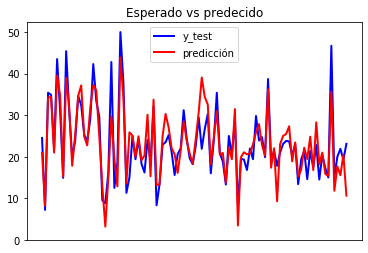

In [602]:
plt.title("Esperado vs predecido")
plt.plot(y_test, color='blue', linewidth=2)
plt.plot(predicciones, color='red', linewidth=2)
plt.legend(["y_test", "predicción"])



plt.xticks(())
plt.yticks([x for x in range(0,60, 10)], [str(x) for x in range(0,60, 10)])

plt.show()

Como vemos, en algunas partes nuestro modelo se ajusta realmente bien, pero en otros dista bastante de la realidad.

# Fuentes

* [Scale, standarize or normalize with scikit-learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
* [IMBD reviews - towardsdatascience](https://towardsdatascience.com/imdb-reviews-or-8143fe57c825)
* [Linear SVC example](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/#:~:text=The%20objective%20of%20a%20Linear,%2C%20or%20categorizes%2C%20your%20data.&text=Other%20than%20the%20visualization%20packages,and%20numpy%20for%20array%20conversion.)
* [Sentyment analysis with python](https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184)
* [A begginers guide to linear regression](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)